In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from scipy.stats import norm

# Loading and Preprocessing Dataset

In [2]:
df = pd.read_csv("../Data/dataset2/Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
df = df.drop(['Timestamp'], axis=1)
df = df.rename(columns={'Choose your gender': 'Gender', 'What is your course?': 'Course', 'Your current year of Study': 'Year', 'What is your CGPA?': 'GPA', 'Marital status': 'Married', 'Do you have Depression?': 'Depression', 'Do you have Anxiety?': 'Anxiety', 'Do you have Panic attack?': 'Panic Attack', 'Did you seek any specialist for a treatment?': 'Seeking Treatment'})

df.head()

,Gender,Age,Course,Year,GPA,Married,Depression,Anxiety,Panic Attack,Seeking Treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
""" Dataset Description """
dataset_shape = df.shape
dataset_info = df.dtypes
missing_vals = df.isnull().sum()
print(f"========Dataset Shape========\n{dataset_shape}\n\n========Data Types and Column Info========\n{dataset_info}\n\n========Missing Values========\n{missing_vals}")

========Dataset Shape========
(101, 10)

========Data Types and Column Info========
Gender                object
Age                  float64
Course                object
Year                  object
GPA                   object
Married               object
Depression            object
Anxiety               object
Panic Attack          object
Seeking Treatment     object
dtype: object

========Missing Values========
Gender               0
Age                  1
Course               0
Year                 0
GPA                  0
Married              0
Depression           0
Anxiety              0
Panic Attack         0
Seeking Treatment    0
dtype: int64


In [5]:
# unique values for each column:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"========Unique values in {column}========\n{unique_values}\n\n")

========Unique values in Gender========
['Female' 'Male']


========Unique values in Age========
[18. 21. 19. 22. 23. 20. 24. nan]


========Unique values in Course========
['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']


========Unique values in Year========
['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']


========Unique values in GPA========
['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']


=======

In [6]:
""" Dropping data with NULL values """
df = df.dropna()

In [7]:
df['Course'] = (df['Course'].apply(lambda x: x.lower().strip()))
print(f"========Before cleaning========\n{df['Course'].unique()}\n\n")

course_map = {
    'islamic education': 'education',
    'bit': 'IT',
    'laws': 'law',
    'mathemathics': 'mathematics',
    'pendidikan islam': 'education',
    'bcs': 'computer science',
    'human resources': 'human sciences',
    'irkhs': 'IRKHS',
    'kenms': 'economics',
    'enm': 'economics',
    'koe': 'education',
    'kirkhs': 'IRKHS',
    'usuluddin': 'IRKHS',
    'taasl': 'education',
    'engine': 'engineering',
    'ala': 'human sciences',
    'benl': 'education',
    'it': 'IT',
    'cts': 'CTS',
    'engin': 'engineering',
    'econs': 'economics',
    'mhsc': 'human sciences',
    'malcom': 'communication',
    'kop': 'pharmacy',
    'diploma nursing': 'nursing',
    'fiqh fatwa': 'IRKHS',
    'diploma tesl': 'education',
    'fiqh': 'IRKHS'
}
df['Course'] = df['Course'].replace(course_map)
print(f"========After cleaning========\n{df['Course'].unique()}\n\n")


========Before cleaning========
['engineering' 'islamic education' 'bit' 'laws' 'mathemathics'
 'pendidikan islam' 'bcs' 'human resources' 'irkhs' 'psychology' 'kenms'
 'accounting' 'enm' 'marine science' 'koe' 'banking studies'
 'business administration' 'law' 'kirkhs' 'usuluddin' 'taasl' 'engine'
 'ala' 'biomedical science' 'benl' 'it' 'cts' 'engin' 'econs' 'mhsc'
 'malcom' 'kop' 'human sciences' 'biotechnology' 'communication'
 'diploma nursing' 'radiography' 'fiqh fatwa' 'diploma tesl' 'fiqh'
 'nursing']


========After cleaning========
['engineering' 'education' 'IT' 'law' 'mathematics' 'computer science'
 'human sciences' 'IRKHS' 'psychology' 'economics' 'accounting'
 'marine science' 'banking studies' 'business administration'
 'biomedical science' 'CTS' 'communication' 'pharmacy' 'biotechnology'
 'nursing' 'radiography']




In [8]:
""" Cleaning up pther feature + Label Encoding """

gender_map = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].map(gender_map)


df = df.astype({'Age': 'int'})


df['Year'] = df['Year'].apply(lambda x: int(x.lower().split(' ')[1]))


def clean_gpa(val):
    bounds = [float(x.strip()) for x in val.split('-')]
    return np.mean(bounds)
df['GPA'] = df['GPA'].apply(lambda val: clean_gpa(val))


yes_no_map = {'Yes': 1, 'No': 0}
for col in ['Married', 'Depression', 'Anxiety', 'Panic Attack', 'Seeking Treatment']:
    df[col] = df[col].map(yes_no_map)

In [9]:
# unique values for each column:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"========Unique values in {column}========\n{unique_values}\n\n")

========Unique values in Gender========
[0 1]


========Unique values in Age========
[18 21 19 22 23 20 24]


========Unique values in Course========
['engineering' 'education' 'IT' 'law' 'mathematics' 'computer science'
 'human sciences' 'IRKHS' 'psychology' 'economics' 'accounting'
 'marine science' 'banking studies' 'business administration'
 'biomedical science' 'CTS' 'communication' 'pharmacy' 'biotechnology'
 'nursing' 'radiography']


========Unique values in Year========
[1 2 3 4]


========Unique values in GPA========
[3.245 3.75  2.745 2.245 0.995]


========Unique values in Married========
[0 1]


========Unique values in Depression========
[1 0]


========Unique values in Anxiety========
[0 1]


========Unique values in Panic Attack========
[1 0]


========Unique values in Seeking Treatment========
[0 1]




# Partitioning Dataset by 'Course' and Saving as CSVs

In [10]:
# df['Course'].unique()

In [11]:
# df_others = df[df['Course'] == 'Others']
# df_engineering = df[df['Course'] == 'Engineering']
# df_business = df[df['Course'] == 'Business']
# df_medical = df[df['Course'] == 'Medical']
# df_law = df[df['Course'] == 'Law']
# df_compsci = df[df['Course'] == 'Computer Science']

In [12]:
# df.to_csv('../Data/clean_df_main.csv',index=False)
# df_others.to_csv('../Data/clean_df_others.csv',index=False)
# df_engineering.to_csv('../Data/clean_df_engineering.csv',index=False)
# df_business.to_csv('../Data/clean_df_business.csv',index=False)
# df_medical.to_csv('../Data/clean_df_medical.csv',index=False)
# df_law.to_csv('../Data/clean_df_law.csv',index=False)
# df_compsci.to_csv('../Data/clean_df_compsci.csv',index=False)

In [13]:
df_without_course = df.drop(['Course'], axis=1)

In [14]:
df_without_course.dtypes

Gender                 int64
Age                    int64
Year                   int64
GPA                  float64
Married                int64
Depression             int64
Anxiety                int64
Panic Attack           int64
Seeking Treatment      int64
dtype: object

# EDA without courses

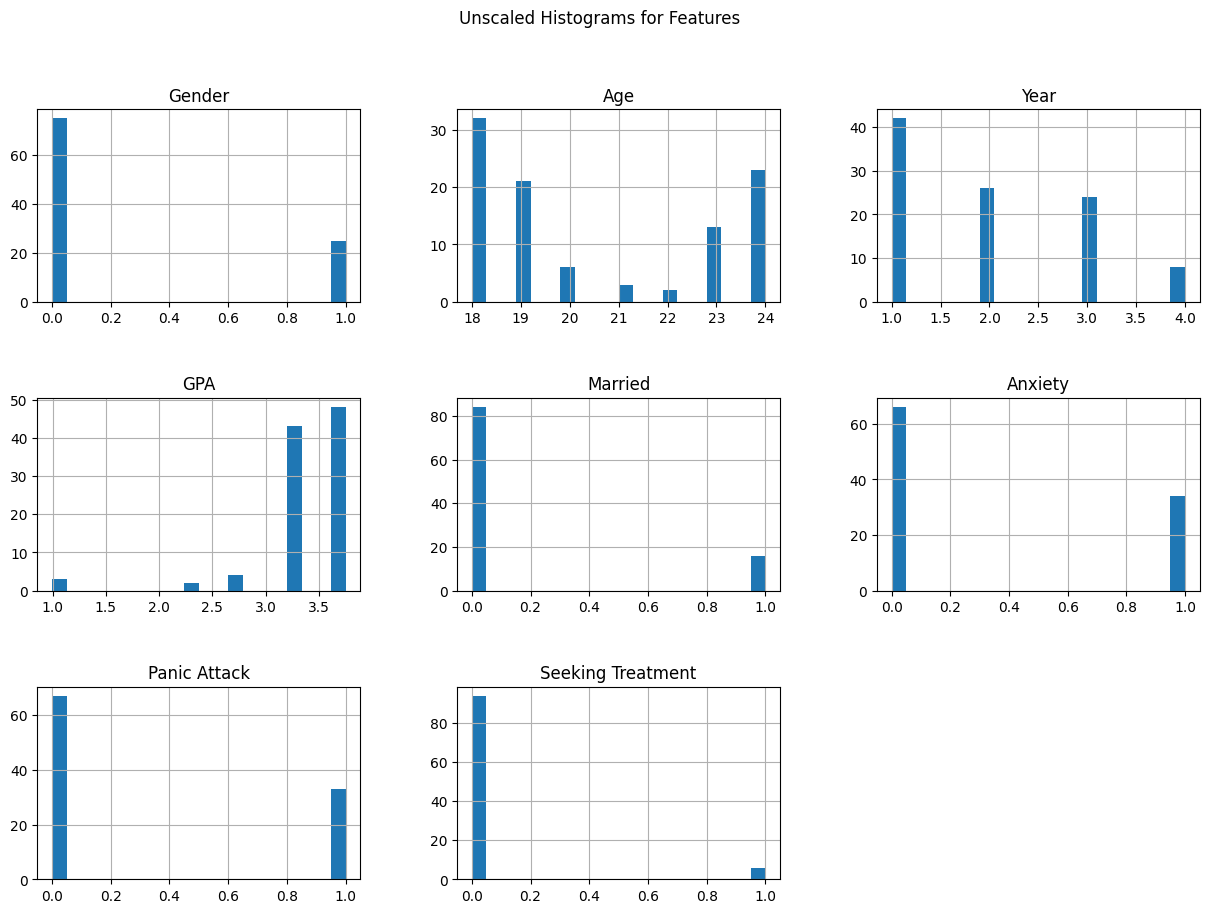

In [15]:
X = df_without_course.drop(['Depression'], axis=1)
y = df['Depression']

X.hist(bins=20, figsize=(15, 10))
plt.suptitle('Unscaled Histograms for Features')
plt.subplots_adjust(hspace=0.5)
plt.show()

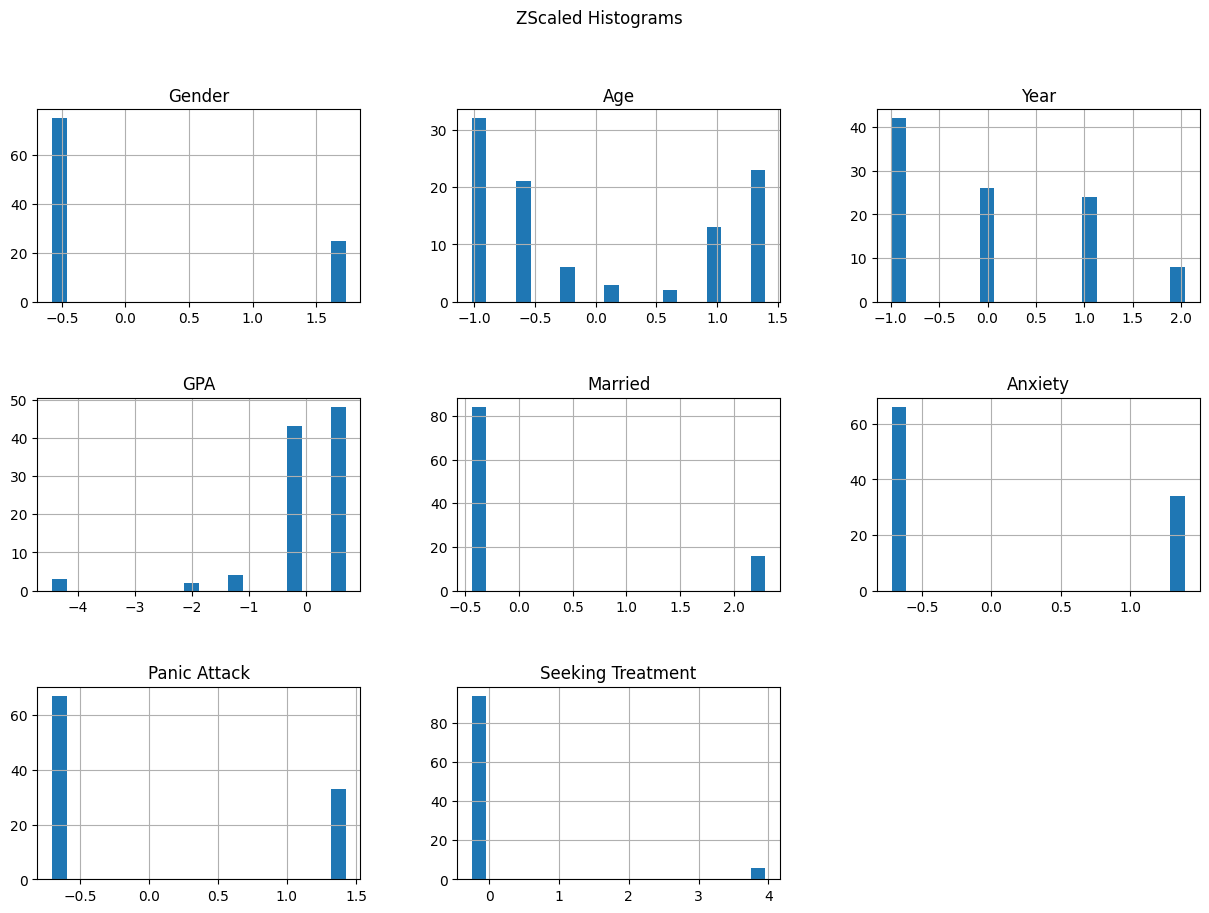

In [16]:
""" Scaling: Z-scale """
Zscaler = StandardScaler()
X_Zscaled = Zscaler.fit_transform(X)
X_Zscaled_df = pd.DataFrame(X_Zscaled, columns=X.columns)
X_Zscaled_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('ZScaled Histograms')
plt.subplots_adjust(hspace=0.5)
plt.show()

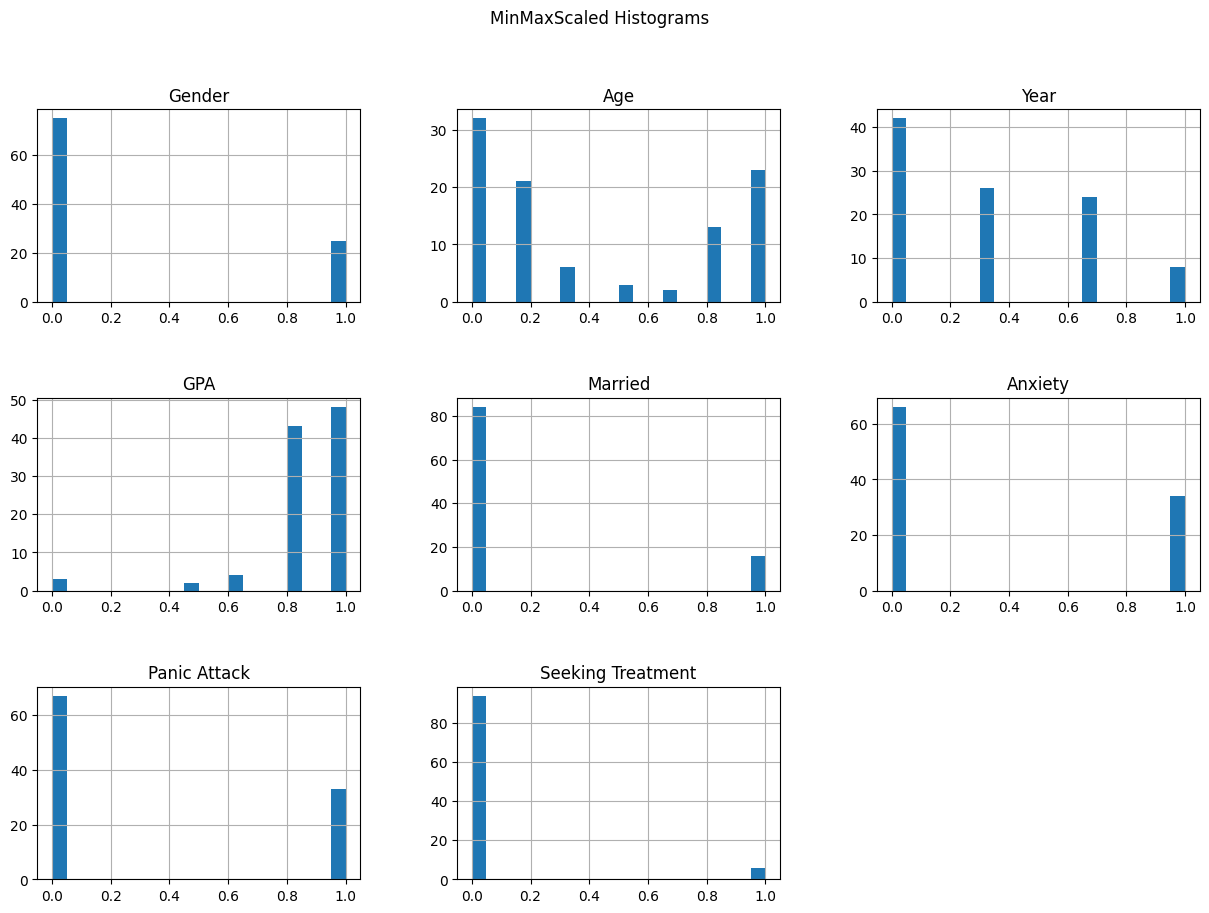

In [17]:
""" Scaling: MinMax """
minMaxScaler = MinMaxScaler()
X_MinMaxScaled = minMaxScaler.fit_transform(X)
X_MinMaxScaled_df = pd.DataFrame(X_MinMaxScaled, columns=X.columns)
X_MinMaxScaled_df.hist(bins=20, figsize=(15, 10))
plt.suptitle('MinMaxScaled Histograms')
plt.subplots_adjust(hspace=0.5)
plt.show()

# Outlier Detection and Handling

In [18]:
def calculate_outliers(df, column_name, remove=False):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    
    if(remove):
        return len(outliers), df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return len(outliers), df

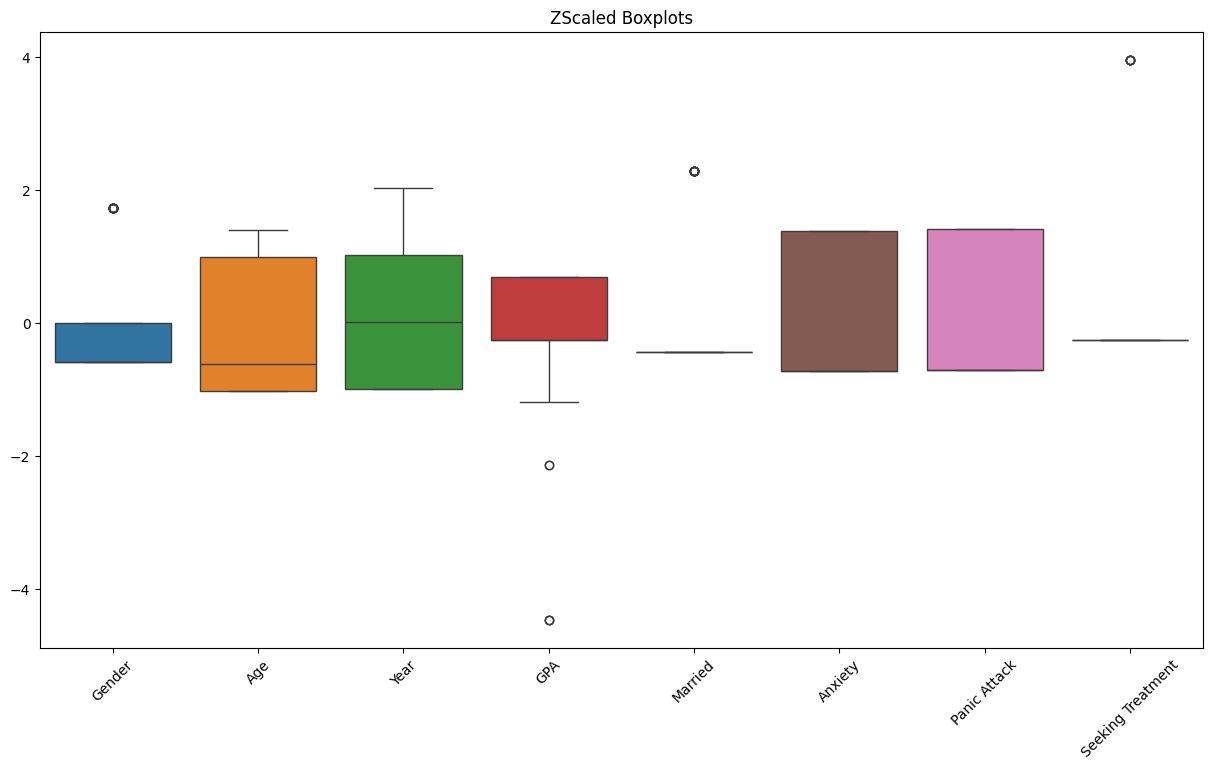

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_Zscaled_df)
plt.title('ZScaled Boxplots')
plt.xticks(rotation=45)
plt.show()

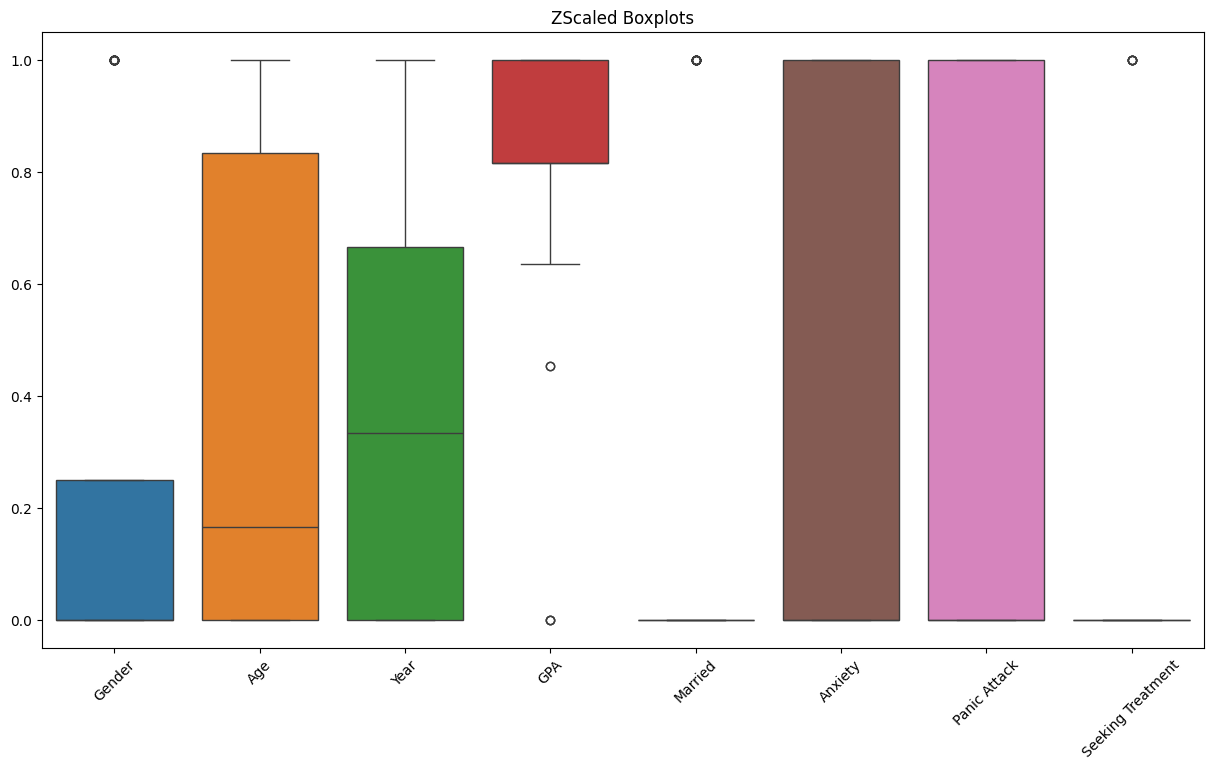

In [20]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_MinMaxScaled_df)
plt.title('ZScaled Boxplots')
plt.xticks(rotation=45)
plt.show()

In [21]:
# num_CGPA_outliers, df_outlier_removed = calculate_outliers(df_Zscaled, 'CGPA', True)
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
# plt.title('ZScaled Boxplots for Numeric Features')
# plt.xticks(rotation=45)
# plt.show()

In [22]:
# num_Age_outliers, df_outliers_removed = calculate_outliers(df_outlier_removed,'Age', True)
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df_Zscaled_outlier_removed[all_cols])
# plt.title('ZScaled Boxplots for Numeric Features')
# plt.xticks(rotation=45)
# plt.show()

# Feature selection

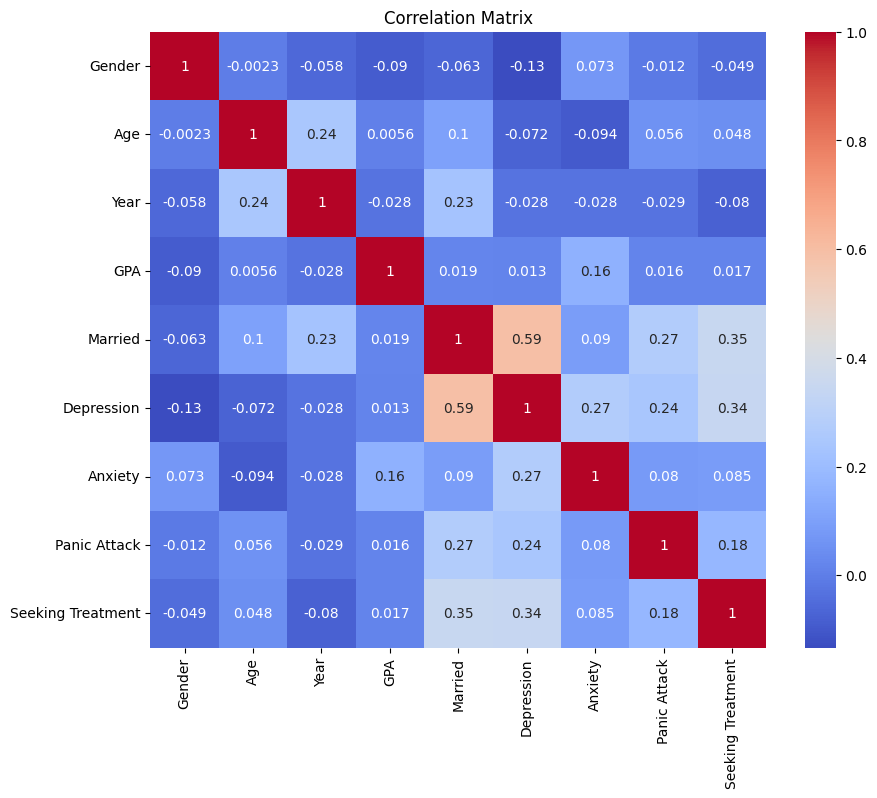

In [23]:
corr_matrix = df_without_course.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Feature importance

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=13, test_size=0.25, shuffle=True
)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importances = tree.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
feature_importances_df

Accuracy: 0.72


,Feature,Importance
4,Married,0.348387
1,Age,0.228023
5,Anxiety,0.107163
7,Seeking Treatment,0.093391
3,GPA,0.074331
6,Panic Attack,0.072075
2,Year,0.052894
0,Gender,0.023736


# Feature selection with tSNE

In [55]:
def split_df(df):
    X = df.drop(['Depression'], axis=1)
    y = df['Depression']

    X = Zscaler.fit_transform(X)

    return train_test_split(X, y, random_state=13, test_size=0.2, shuffle=True)

def find_optimal_perplexity_sklearn(df, plot_title, **kwargs):
    X_train, X_test, y_train, y_test = split_df(df)
    perplexity = np.arange(5, 55, 5)
    divergence = []

    for i in perplexity:
        print('starting tsne w perplexity ', i, '...')
        model = TSNE(n_components=3, perplexity=i, init='pca')
        # model = TSNE(n_jobs=20, *kwargs)
        reduced = model.fit_transform(X_train)
        divergence.append(model.kl_divergence_)
    
    plt.plot(perplexity, divergence)
    plt.title(plot_title)
    plt.xlabel('Perplexity')
    plt.ylabel('Divergence')

    optimal_perplexity = perplexity[np.argmin(divergence)]
    tsne = TSNE(n_components=3, perplexity=50, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)

    fig = px.scatter_3d(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], z=X_train_tsne[:, 2], color=y_train, opacity=0.8)
    fig.update_layout(
        title="t-SNE visualization of the dataset"
    )
    fig.show()

        
def find_optimal_perplexity_opentsne(df, plot_title, **kwargs):
    X_train, X_test, y_train, y_test = split_df(df)
    perplexity = np.arange(5, 55, 5)
    divergence = []

    for i in perplexity:
        print('starting tsne w perplexity ', i, '...')
        # model = TSNE(n_components=3, perplexity=i)
        model = TSNE(n_jobs=20, *kwargs)
        reduced = model.fit_transform(X_train)
        divergence.append(model.kl_divergence_)

    plt.plot(perplexity, divergence)
    plt.title(plot_title)
    plt.xlabel('Perplexity')
    plt.ylabel('Divergence')


starting tsne w perplexity  5 ...
starting tsne w perplexity  10 ...
starting tsne w perplexity  15 ...
starting tsne w perplexity  20 ...
starting tsne w perplexity  25 ...
starting tsne w perplexity  30 ...
starting tsne w perplexity  35 ...
starting tsne w perplexity  40 ...
starting tsne w perplexity  45 ...
starting tsne w perplexity  50 ...


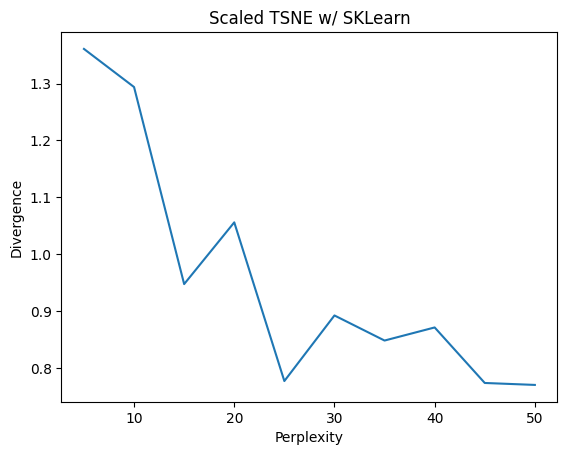

In [56]:
find_optimal_perplexity_sklearn(df_without_course, 'Scaled TSNE w/ SKLearn')